# Análisis Exploratorio y Tratamiento de Datos

## 1.Inicializando Librerías

In [5]:
#import sklearn
import numpy as np
#import seaborn as sb
import matplotlib.pylab as plt
import pandas as pd

## 2.Lectura del Dataset

In [6]:
df = pd.read_csv('datos_banco.csv', encoding = "ISO-8859-1")

In [7]:
df.head(5)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


In [8]:
df.shape

(1719, 14)

## 3.Descartamos variables / Feature Selection
Descartamos la columnas del dataframe que no nos serán relevantes a la hora de aplicar el modelo, estas columnas contienen los 
datos de del género, nivel de educación, si escogió el número de cuotas ofrecidas por el banco y si escogió el monto de dinero ofrecido por el banco.  
A su vez retiramos la columna target de nuestro x_df ya que esta columna será nuestro y_df.

In [9]:
x_df = df.drop(["target","person_gender","default_request_term","default_request_amount","person_degree_type_desc"], axis = 1)

y_df = df["target"]

print("shape of x_df = ", x_df.shape)
print("shape of y_df = ", y_df.shape)

shape of x_df =  (1719, 9)
shape of y_df =  (1719,)


In [10]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.39,9.0,"1,200",6,289.11,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.57,50.0,"2,200",12,696.15,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.5,64.0,"1,000",3,84.99,2082.196667,S,NORMAL
3,LIBDISP8375185888,848.65,77.0,"1,500",6,221.53,3422.423333,S,NORMAL
4,LIBDISP9694463037,470.52,82.0,"1,000",3,91.34,1882.090000,S,NORMAL


## 4.Exploración y corrección de valores 

In [11]:
x_df.groupby('var_max_sbs_qual_12m').size()

var_max_sbs_qual_12m
CPP            202
DEFICIENTE      31
DUDOSO           1
NORMAL        1481
PERDIDA          4
dtype: int64

In [12]:
x_df["monthly_debt_capacity"] = x_df["monthly_debt_capacity"].replace(',','', regex=True)
x_df["monthly_debt_capacity"] = pd.to_numeric(x_df["monthly_debt_capacity"], downcast="float")

x_df["approved_amount"] = x_df["approved_amount"].replace(',','', regex=True)
x_df["approved_amount"] = pd.to_numeric(x_df["approved_amount"], downcast="float")

x_df["approved_term"] = x_df["approved_term"].replace(',','', regex=True)
x_df["approved_term"] = pd.to_numeric(x_df["approved_term"], downcast="float")

x_df["approved_interest_amount"] = x_df["approved_interest_amount"].replace(',','', regex=True)
x_df["approved_interest_amount"] = pd.to_numeric(x_df["approved_interest_amount"], downcast="float")

x_df["var_employment_time_in_months"] = x_df["var_employment_time_in_months"].replace(',','', regex=True)
x_df["var_employment_time_in_months"] = pd.to_numeric(x_df["var_employment_time_in_months"], downcast="float")

x_df["var_net_income"] = x_df["var_net_income"].replace(',','', regex=True)
x_df["var_net_income"] = pd.to_numeric(x_df["var_net_income"], downcast="float")

x_df.head()

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,S,NORMAL
3,LIBDISP8375185888,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,S,NORMAL
4,LIBDISP9694463037,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,S,NORMAL


In [13]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639465,33.979591,2136.998291,6.464805,407.185822,2693.545898
std,459.958893,26.889423,1504.944702,3.009842,407.703064,1825.694702
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000


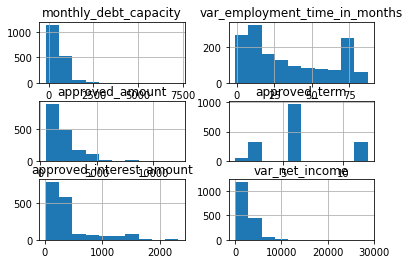

In [14]:
x_df.hist();


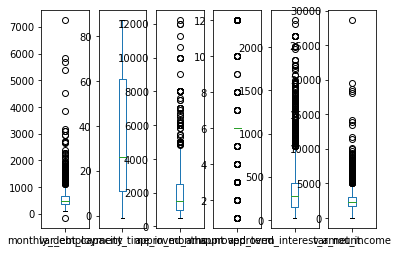

In [15]:
x_df.plot(kind='box', subplots=True);

## 5.One hot encoding para columnas categóricas

In [16]:
for i,id in enumerate(x_df["idPrestamo"]):
    x_df['idPrestamo'][i]=i

#check if theres that one step left / colab class
x_df = pd.concat([x_df,pd.get_dummies(df['credit_history_marital_status'], prefix='CHMS')],axis=1)
x_df.drop(['credit_history_marital_status'],axis=1, inplace=True)

x_df = pd.concat([x_df,pd.get_dummies(df['var_max_sbs_qual_12m'], prefix='VMSQ12')],axis=1)
x_df.drop(['var_max_sbs_qual_12m'],axis=1, inplace=True)


In [17]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,1,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,2,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,3,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,4,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0


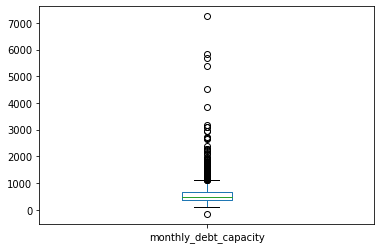

In [18]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True);

In [19]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639465,33.979591,2136.998291,6.464805,407.185822,2693.545898,0.162885,0.007563,0.828970,0.000582,0.117510,0.018034,0.000582,0.861547,0.002327
std,459.958893,26.889423,1504.944702,3.009842,407.703064,1825.694702,0.369369,0.086659,0.376644,0.024119,0.322121,0.133112,0.024119,0.345475,0.048196
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.Reemplazamos Valores Faltantes


In [20]:
num_vars = x_df.select_dtypes(include=["int32","float32"]).columns
x_df["approved_term"].dtype

dtype(&#39;float32&#39;)

In [21]:
num_vars 

Index([&#39;monthly_debt_capacity&#39;, &#39;var_employment_time_in_months&#39;,
       &#39;approved_amount&#39;, &#39;approved_term&#39;, &#39;approved_interest_amount&#39;,
       &#39;var_net_income&#39;],
      dtype=&#39;object&#39;)

In [22]:
x_df[num_vars].isnull().sum()

monthly_debt_capacity              0
var_employment_time_in_months    200
approved_amount                    0
approved_term                      0
approved_interest_amount           0
var_net_income                     0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = "mean")

In [24]:
imputer_mean.fit(x_df[num_vars])

SimpleImputer()

In [25]:
imputer_mean.statistics_

array([ 584.63947062,   33.97959184, 2136.9982548 ,    6.46480512,
        407.18582752, 2693.54595695])

In [26]:
imputer_mean.transform(x_df[num_vars])

array([[ 252.39  ,    9.    , 1200.    ,    6.    ,  289.11  , 1140.125 ],
       [ 244.57  ,   50.    , 2200.    ,   12.    ,  696.15  , 1061.375 ],
       [ 491.5   ,   64.    , 1000.    ,    3.    ,   84.99  , 2082.1968],
       ...,
       [ 692.13  ,   56.    , 2500.    ,    6.    ,  360.78  , 2768.5   ],
       [ 410.28  ,   80.    ,  900.    ,    3.    ,   79.89  , 2139.2583],
       [ 480.74  ,   12.    , 1000.    ,    3.    ,   84.99  , 2083.33  ]],
      dtype=float32)

In [27]:
x_df[num_vars] = imputer_mean.transform(x_df[num_vars])

In [28]:
x_df[num_vars].isnull().sum()

monthly_debt_capacity            0
var_employment_time_in_months    0
approved_amount                  0
approved_term                    0
approved_interest_amount         0
var_net_income                   0
dtype: int64

## 7.Normalización

In [29]:
import pandas as pd
from sklearn import preprocessing

# x = x_df["monthly_debt_capacity"].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled_test = min_max_scaler.fit_transform(x_df["monthly_debt_capacity"][:,np.newaxis])
#df_test1 = pd.DataFrame(x_scaled_test)

#X_normalized = preprocessing.normalize(x_df["monthly_debt_capacity"][:,np.newaxis], norm='l2')
#df_test = pd.DataFrame(X_normalized)


# df_test1.head(10)
# df_test1.describe()

#x_df["monthly_debt_capacity"]=x_scaled_test

In [30]:
#x_df["monthly_debt_capacity"].plot(kind='box', subplots=True)

In [31]:
x_df.head(10)


,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0,252.389999,9.000000,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,1,244.570007,50.000000,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,2,491.500000,64.000000,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,3,848.650024,77.000000,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,4,470.519989,82.000000,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0
5,5,490.769989,79.000000,1500.0,6.0,221.529999,2448.016602,0,0,1,0,0,0,0,1,0
6,6,428.570007,71.000000,4000.0,12.0,1109.560059,1803.923340,0,0,1,0,0,0,0,1,0
7,7,647.869995,4.000000,1200.0,6.0,289.109985,2660.629883,0,0,1,0,0,0,0,1,0
8,8,694.229980,33.979591,900.0,6.0,149.789993,2912.158447,1,0,0,0,1,0,0,0,0
9,9,209.479996,77.000000,1000.0,6.0,152.320007,2498.043213,0,0,1,0,0,0,0,1,0


## 8.Definición de columna Idprestamo como Índices

In [32]:
x_df = x_df.set_index("idPrestamo")

Dropping the negative value that was in the column : monthly_debt_capacity

In [33]:

indexPoorValue = x_df[x_df["monthly_debt_capacity"]<0].index[0]
x_df =x_df.drop([indexPoorValue])
y_df =y_df.drop([indexPoorValue])
x_df[x_df["monthly_debt_capacity"]<0]


,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
idPrestamo,,,,,,,,,,,,,,,


In [34]:
normalizer = preprocessing.Normalizer().fit(x_df)
test =normalizer.transform(x_df)
columnsDF = x_df.columns
x_df = pd.DataFrame(data = test, columns = columnsDF)
x_df.head()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.148534,0.005297,0.706214,0.003531,0.170145,0.670977,0.000589,0.0,0.000000,0.0,0.0,0.0,0.0,0.000589,0.0
1,0.095828,0.019591,0.862010,0.004702,0.272767,0.415871,0.000000,0.0,0.000392,0.0,0.0,0.0,0.0,0.000392,0.0
2,0.207911,0.027073,0.423014,0.001269,0.035952,0.880798,0.000000,0.0,0.000423,0.0,0.0,0.0,0.0,0.000423,0.0
3,0.221058,0.020057,0.390723,0.001563,0.057705,0.891479,0.000000,0.0,0.000260,0.0,0.0,0.0,0.0,0.000260,0.0
4,0.215239,0.037511,0.457450,0.001372,0.041783,0.860962,0.000000,0.0,0.000457,0.0,0.0,0.0,0.0,0.000457,0.0


monthly_debt_capacity    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

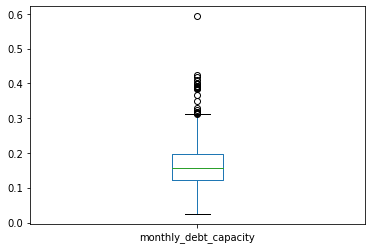

In [35]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True)

## 9.Splitting dataset into 80-20/ HOLDOUT SETS

In [36]:
x_df.head()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0.148534,0.005297,0.706214,0.003531,0.170145,0.670977,0.000589,0.0,0.000000,0.0,0.0,0.0,0.0,0.000589,0.0
1,0.095828,0.019591,0.862010,0.004702,0.272767,0.415871,0.000000,0.0,0.000392,0.0,0.0,0.0,0.0,0.000392,0.0
2,0.207911,0.027073,0.423014,0.001269,0.035952,0.880798,0.000000,0.0,0.000423,0.0,0.0,0.0,0.0,0.000423,0.0
3,0.221058,0.020057,0.390723,0.001563,0.057705,0.891479,0.000000,0.0,0.000260,0.0,0.0,0.0,0.0,0.000260,0.0
4,0.215239,0.037511,0.457450,0.001372,0.041783,0.860962,0.000000,0.0,0.000457,0.0,0.0,0.0,0.0,0.000457,0.0


In [37]:
splitIndex = int(x_df.shape[0]*0.8)
X_train = x_df.iloc[:splitIndex].to_numpy()
X_test = x_df.iloc[splitIndex:].to_numpy()

Y_train = y_df.iloc[:splitIndex].to_numpy()
Y_test = y_df.iloc[splitIndex:].to_numpy()

# Aplicación y Validación de Modelos 

## 1.K Nearest Neighbor

In [38]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=60)


In [40]:
knn.fit(X_train, Y_train)
y2_model = knn.predict(X_test)
accuracy_score(Y_test, y2_model)

0.6540697674418605

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x_df,y_df, cv=20)
scores.mean()

0.6867852257181942

## 2.Decision Tree Model

In [42]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [43]:
#tree.plot_tree(clf);


In [44]:
y2_dtModel = clf.predict(X_test)

In [45]:

accuracy_score(Y_test, y2_dtModel)

0.622093023255814

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

dtScores = []

cross_val_score(clf, X_train, Y_train, cv=5)
dtscores1 = cross_val_score(clf, X_train, Y_train, cv=LeaveOneOut())
dtScores.append(dtscores1.mean())

cross_val_score(clf, X_train, Y_train, cv=10)
dtscores2 = cross_val_score(clf, X_train, Y_train, cv=LeaveOneOut())
dtScores.append(dtscores2.mean())

cross_val_score(clf, X_train, Y_train, cv=15)
dtscores3 = cross_val_score(clf, X_train, Y_train, cv=LeaveOneOut())
dtScores.append(dtscores3.mean())

cross_val_score(clf, X_train, Y_train, cv=20)
dtscores4 = cross_val_score(clf, X_train, Y_train, cv=LeaveOneOut())
dtScores.append(dtscores4.mean())

In [48]:
print(dtScores)

[0.6375545851528385, 0.6441048034934498, 0.6317321688500728, 0.6448326055312955]


## 3.Logistic Regression

### Importamos la libreria

In [49]:
from sklearn.linear_model import LogisticRegression

### Instanciamos y entrenamos el modelo

In [50]:
clf_LR = LogisticRegression(random_state=0).fit(X_train, Y_train)

### Obtenemos el score

In [51]:
y_LRModel = clf_LR.predict(X_test)

clf_LR.score(X_test, Y_test)

0.7034883720930233

## 4.XGBoost

In [52]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train,Y_train)
dtest = xgb.DMatrix(X_test)

In [53]:
params = {
    'n_estimators': 100,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'min_child_weight': 1,
    'learning_rate': 0.1,
    'subsample': 0.8,    
    'eta': 0.2
}

In [54]:
model_xgb = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    nfold=5,
    early_stopping_rounds=100
)

[15:17:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

In [55]:
num_round = 10
bst = xgb.train(params, dtrain, num_boost_round=len(model_xgb))

[15:17:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [56]:
from sklearn.metrics import f1_score

preds = bst.predict(dtest)

for i in range(len(preds)):
    if preds[i]<0.8:
      preds[i]=1
    else:
      preds[i]=0

f1 = f1_score(Y_test, preds)
print(f1)

0.4812362030905078


# Resultados Finales


In [57]:
a1 = round((accuracy_score(Y_test, y2_model)*100),2)
a2 = round((accuracy_score(Y_test, y2_dtModel)*100),2)
a3 = round((clf_LR.score(X_test, Y_test)*100),2)
a4 = round((f1*100),2)


print("KNN accuracy: " + str(a1)+"%")
print("Decision Tree accuracy: " + str(a2)+"%")
print("Logistic Regression accuracy: " + str(a3)+"%")
print("XGBoost accuracy: " + str(a4)+"%")

KNN accuracy: 65.41%
Decision Tree accuracy: 62.21%
Logistic Regression accuracy: 70.35%
XGBoost accuracy: 48.12%


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
scoring = "neg_mean_squared_error"

#cross_val_score(clf, X_train, Y_train, cv=5)
#dtscores1 = cross_val_score(clf, X_train, Y_train, cv=LeaveOneOut())

results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=1)



In [71]:
##### Decision Tree

cv_resultsDT = cross_val_score(clf, x_df, y_df, cv=5,scoring=scoring)
results.append(cv_resultsDT)
names.append("Decision Tree")

msg = "%s: %f (%f)" % (names[0], cv_resultsDT.mean(),   cv_resultsDT.std())
print(msg)


Decision Tree: -0.369618 (0.028385)


In [70]:
##### Logistic Regression

cv_resultsLR = cross_val_score(clf_LR, x_df, y_df, cv=5,scoring=scoring)
results.append(cv_resultsLR)
names.append("Logistic Regression")

msg = "%s: %f (%f)" % (names[1], cv_resultsLR.mean(),   cv_resultsLR.std())
print(msg)

Logistic Regression: -0.278807 (0.005347)


In [69]:
##### K Nearest Neighbor

cv_resultsKNN = cross_val_score(knn, x_df, y_df, cv=5,scoring=scoring)
results.append(cv_resultsKNN)
names.append("K Nearest Neighbor")

msg = "%s: %f (%f)" % (names[2], cv_resultsKNN.mean(),   cv_resultsKNN.std())
print(msg)

K Nearest Neighbor: -0.317811 (0.011983)


In [62]:
##### XGBoost

cv_resultsXGB = cross_val_score(bst, x_df, y_df, cv=kfold,scoring=scoring)
results.append(cv_resultsXGB)
names.append("XGBoost")

msg = "%s: %f (%f)" % (names[3], cv_resultsXGB.mean(),   cv_resultsXGB.std())
print(msg)

TypeError: estimator should be an estimator implementing &#39;fit&#39; method, &lt;xgboost.core.Booster object at 0x00000274A2606EF0&gt; was passed

# Conclusiones
